In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


In [6]:
?confusion_matrix

In [7]:
confusion_matrix([1, 2, 2, 2], [0, 1, 0, 1])

array([[0, 0, 0],
       [1, 0, 0],
       [1, 2, 0]], dtype=int64)

In [8]:
confusion_matrix([15,30], [15,40])

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 0]], dtype=int64)

In [9]:
precision_score([15,30], 
                [15,40], average="micro")

0.5

In [10]:
precision_score([15,30], 
                [15,40], average="macro")

D:\Programs\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3333333333333333

In [11]:
confusion_matrix([15,30,40,30,15,30,15,30,40,30,15,40,40,40], [15,40,15,15,30,40,30,40,30,30,15,40,40,40])

array([[2, 2, 0],
       [1, 1, 3],
       [1, 1, 3]], dtype=int64)

In [12]:
(1/2 + 1/4 + 1/2)/3

0.4166666666666667

In [13]:
6/(1+1+1+3+2+6)

0.42857142857142855

In [14]:
precision_score([15,30,40,30,15,30,15,30,40,30,15,40,40,40], 
                [15,40,15,15,30,40,30,40,30,30,15,40,40,40], average="micro")

0.42857142857142855

In [15]:
precision_score([15,30,40,30,15,30,15,30,40,30,15,40,40,40], 
                [15,40,15,15,30,40,30,40,30,30,15,40,40,40], average="macro")

0.4166666666666667

In [16]:
?precision_score

In [17]:
precision = precision_score([15,30], [15,40],average='micro')
recall = precision_score([15,30], [15,40],average='macro')

D:\Programs\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
precision

0.5

In [19]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})


In [20]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [22]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [23]:
clf = clf.fit(X, y)

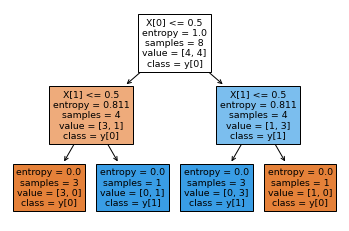

In [24]:
plt.figure()
tree.plot_tree(clf, filled=True, class_names=True);

In [25]:
cats = pd.read_csv('cats.csv', index_col=0)
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [26]:
clfb = tree.DecisionTreeClassifier(criterion='entropy')

In [27]:
X = cats.iloc[:, 0:3]
y = cats.iloc[:, 3]

In [28]:
X.columns

Index(['Шерстист', 'Гавкает', 'Лазает по деревьям'], dtype='object')

In [29]:
y.to_dict()

{0: 'собачка',
 1: 'собачка',
 2: 'собачка',
 3: 'собачка',
 4: 'котик',
 5: 'котик',
 6: 'котик',
 7: 'котик',
 8: 'котик',
 9: 'котик'}

In [30]:
clf = clfb.fit(X.iloc[:, [0]], y)

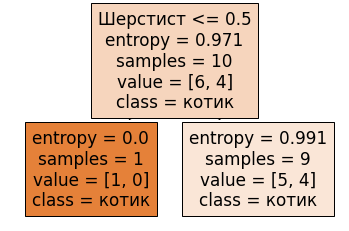

In [31]:
fig1 = plt.figure()
tree.plot_tree(clf, 
               filled=True, 
               feature_names=X.columns, 
               class_names={1: 'собачка', 0: 'котик'});

In [32]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [33]:
def entropy(n1, n2):
    if not n1 or not n2:
        return 0
    p1 = n1/(n1+n2)
    p2 = n2/(n1+n2)
    return - p1*np.log2(p1) - p2*np.log2(p2)

In [34]:
def igain(E0, n1, n2, n3, n4):
    N = n1 + n2 + n3 + n4
    E1 = entropy(n1, n2)
    E2 = entropy(n3, n4)
    return E0 - E1*(n1+n2)/N - E2*(n3+n4)/N

In [35]:
E0 = entropy(4, 6)
E0

0.9709505944546686

Шертист < 0.5
да - соб: 0, кот: 1 entropy = - 0 log 0 - 1 log 1 = 0 
нет- соб: 4, кот: 5 entropy = -4/9 log4/9 -5/9 log 5/9 = 0.991

In [36]:
igain(E0, 0, 1, 4, 5)

0.07898214060026854

Лазает < 0.5
да - соб: 4, кот: 0 entropy = - 1 log 1 - 0 log 0 = 0 
нет- соб: 0, кот: 6 entropy = -0 log0 - 1 log 1 = 0

In [37]:
igain(E0, 4, 0, 0, 6)

0.9709505944546686

Гавкает < 0.5
да - соб: 0, кот: 5 entropy = - 0 log 0 - 1 log 1 = 0 
нет- соб: 4, кот: 1 entropy = -4/5 log4/5 -1/5 log 1/5 = 0.722

In [38]:
igain(E0, 0, 5, 4, 1)

0.6099865470109874

In [39]:
titanic = pd.read_csv('titanic.csv')

In [40]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## songs

In [41]:
songs = pd.read_csv('songs.csv')
songs

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [42]:
X = songs.loc[:, ['length', 'commas', 'exclamations', 'colons', 'hyphens']]
X

,length,commas,exclamations,colons,hyphens
0,1300,24,5,0,11
1,1566,0,0,0,0
2,996,1,0,1,0
3,2868,5,0,0,0
4,3351,22,0,0,3
...,...,...,...,...,...
355,972,2,0,0,1
356,1283,33,0,0,3
357,810,1,0,0,0
358,1996,34,0,0,5


In [43]:
y = songs.artist
y

0           gangstarr
1      blind-guardian
2      blind-guardian
3      blind-guardian
4           gangstarr
            ...      
355              abba
356              abba
357              abba
358         gangstarr
359              abba
Name: artist, Length: 360, dtype: object

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
precision_score(y_test, y_pred, average='micro')

0.7333333333333333

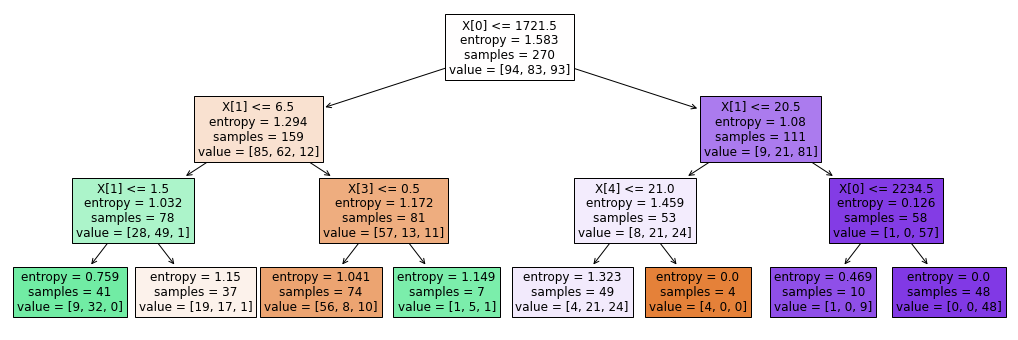

In [47]:
plt.figure(figsize=(18, 6))
tree.plot_tree(clf, filled=True, fontsize=12);

In [48]:
parameters = {'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}

In [49]:
dec_tree = tree.DecisionTreeClassifier()
clf_gs = GridSearchCV(dec_tree, parameters, cv=5)
clf_gs.fit(X_train, y_train)
clf_gs.score(X_test, y_test)

0.7111111111111111

In [50]:
clf_gs.best_params_

{'max_depth': 4}

In [51]:
clf_gs.score(X_test, y_test)

0.7111111111111111

In [52]:
clf_gs.best_score_

0.6962962962962962

In [53]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00220065, 0.0018002 , 0.00200033, 0.00220065, 0.00220017,
        0.00220103, 0.00220037, 0.00200033, 0.00220122, 0.0024003 ,
        0.00200095, 0.00240078]),
 'std_fit_time': array([3.99685247e-04, 4.00376331e-04, 3.98950589e-07, 4.00161772e-04,
        4.00042886e-04, 4.00090342e-04, 4.00066518e-04, 2.13248060e-07,
        3.99877261e-04, 4.90154472e-04, 3.23406696e-07, 4.90154495e-04]),
 'mean_score_time': array([0.00140014, 0.00140028, 0.00100012, 0.0012002 , 0.00160065,
        0.00119972, 0.00120025, 0.00100026, 0.00119991, 0.00100017,
        0.00139985, 0.00120015]),
 'std_score_time': array([4.90154727e-04, 4.89843011e-04, 1.78416128e-07, 4.00185624e-04,
        4.90193553e-04, 4.00066546e-04, 4.00161828e-04, 2.43140197e-07,
        4.00209555e-04, 1.50789149e-07, 4.89998722e-04, 4.00090427e-04]),
 'param_max_depth': masked_array(data=[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22],
              mask=[False, False, False, False, False, False, False, Fa

In [54]:
sorted(clf_gs.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## module 2 practice

In [55]:
data_tree = pd.read_csv("train_data_tree.csv")
data_tree.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [56]:
data_tree.num.value_counts()

0    128
1    110
Name: num, dtype: int64

In [57]:
0.5*np.log2(0.5) + 0.5*np.log2(0.5)

-1.0

In [58]:
128/238*np.log2(128/238) + 110/238*np.log2(110/238)

-0.9958699965528488

In [59]:
data_tree.describe()

,sex,exang,num
count,238.000000,238.000000,238.000000
mean,0.710084,0.340336,0.462185
std,0.454679,0.474821,0.499619
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [60]:
X = data_tree.loc[:, ['sex', 'exang']]
y = data_tree.num

In [61]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

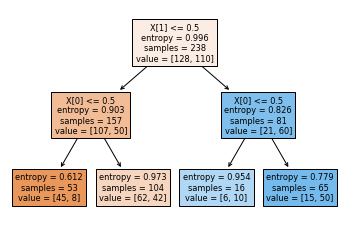

In [62]:
tree.plot_tree(clf, filled=True);

In [63]:
def entropy(a, b):
    p1 = a/(a+b)
    p2 = b/(a+b)
    return -p1*np.log2(p1)-p2*np.log2(p2) 

In [64]:
entropy(128, 110) - entropy(107, 50)*157/238 - entropy(21, 60)*81/238

0.11939340343891597

In [65]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0] # индекс корня правого поддерева

n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве

e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

n = clf.tree_.n_node_samples[0] # суммарное кол-во сэмплов
e = clf.tree_.impurity[0] # энтропия корня дерева

average_child_enthropy = (e1*n1/n) + (e2*n2/n)

information_gain = e - average_child_enthropy
information_gain

0.11939340343891591

In [66]:
l_node, r_node

(1, 4)

In [67]:
dir(clf.tree_)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'compute_partial_dependence',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_leaves',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

## IRIS

In [68]:
iris = load_iris()
X = iris.data
y = iris.target

In [69]:
params = {
    'max_depth': [x for x in range(1, 11)],
    'min_samples_split': [x for x in range(2, 11)],
    'min_samples_leaf': [x for x in range(1, 11)]
}
search = GridSearchCV(DecisionTreeClassifier(), params)
search.fit(X, y)
best_tree = search.best_estimator_

In [70]:
search.best_score_

0.9733333333333334

In [71]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [72]:
search2 = RandomizedSearchCV(DecisionTreeClassifier(), params)
search2.fit(X, y)
best_tree = search2.best_estimator_

In [73]:
search2.best_score_

0.9666666666666668

In [74]:
search2.best_params_

{'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 10}

## IRIS

In [75]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

predicted = dt.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(precision_score(y_test, predicted, average="micro"))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158


In [76]:
(100+100+100*9/10)/3

96.66666666666667

In [77]:
37/38

0.9736842105263158

In [78]:
data = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})
data

,a,b
0,1,4
1,2,5
2,3,6


In [79]:
data.drop(['a'], axis=1)

,b
0,4
1,5
2,6


## Random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
titanic_data = pd.read_csv('titanic_data/train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [82]:
clf_rf = RandomForestClassifier()

In [83]:
parameters = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 5, 7, 10]
}

In [84]:
grid_search_cv_rf = GridSearchCV(clf_rf, parameters, cv=5)

In [85]:
grid_search_cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [86]:
print(grid_search_cv_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})


In [87]:
grid_search_cv_rf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [88]:
best_clf = grid_search_cv_rf.best_estimator_

In [89]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [90]:
feature_importances = best_clf.feature_importances_

In [91]:
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.264983
6,Sex_male,0.222380
0,Pclass,0.144813
4,Fare,0.134963
1,Age,0.101374
2,SibSp,0.037830
3,Parch,0.032655
9,Embarked_S,0.027519
7,Embarked_C,0.022594
8,Embarked_Q,0.010889


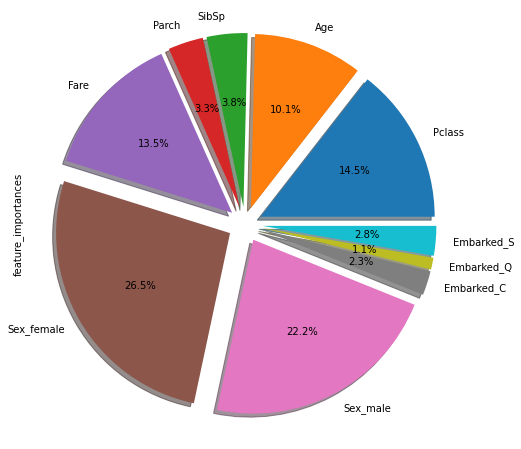

In [92]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));


<AxesSubplot:>

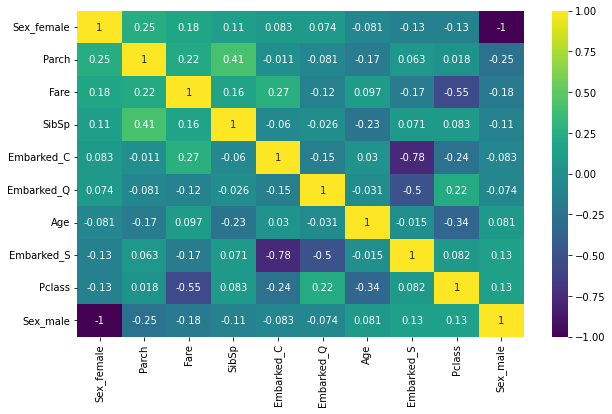

In [93]:
import seaborn as sns

k = len(X.columns) #количество ячеек for heatmap
cols = X.corr().nlargest(k, 'Sex_female')['Sex_female'].index
cm = X[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## practice

In [94]:
def test(n_estimators=10, max_depth=1):
    print('n_estimators: {0}, max_depth: {1}'.format(n_estimators, max_depth))

In [95]:
test()

n_estimators: 10, max_depth: 1


In [96]:
params = {'n_estimators': 1, 'max_depth': 1}
test(**params)
rf = RandomForestClassifier()

n_estimators: 1, max_depth: 1


In [97]:
rf = RandomForestClassifier(**params, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [98]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [99]:
rf = RandomForestClassifier(n_estimators=1, max_depth=1, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [100]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [101]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [103]:
X = data.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [105]:
y = data.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [119]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)

In [120]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [114]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [121]:
rf.feature_importances_

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

<AxesSubplot:>

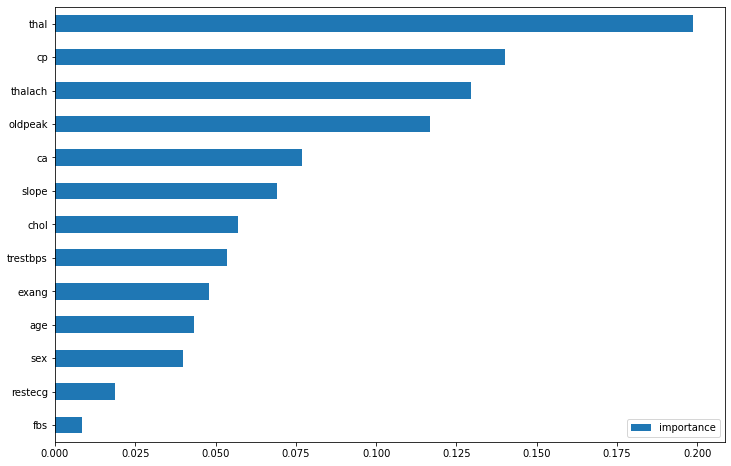

In [126]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [124]:
imp.sort_values('importance')

,importance
fbs,0.008493
restecg,0.018583
sex,0.039990
age,0.043441
exang,0.048079
trestbps,0.053569
chol,0.056887
slope,0.069208
ca,0.077048
oldpeak,0.116645
